# Importing Libraris & Data sets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
res = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات النتائج.xlsx",
                    usecols = "A:P")
std = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\البيانات العامة.xlsx",
                   usecols = "A:D,F,G,J")

In [ ]:
res.columns

In [ ]:
std.columns

# Data pre processing

## Result Data

In [ ]:
res.info()

In [ ]:
res.dropna(axis=0, inplace=True)
res.info()

In [ ]:
res[res.duplicated(subset=None)]

In [ ]:
res.drop_duplicates(subset=None, inplace= True)
res

## Students Data

In [ ]:
std.info()

In [ ]:
std.head()

In [ ]:
std[std.duplicated(subset="Student/Code")]

In [ ]:
std.drop_duplicates(subset="Student/Code", inplace= True)
std

## merge Data 

In [ ]:
main = res.merge(std,
          how = 'outer',
         left_on = 'كود الطالب',
         right_on = 'Student/Code')
main.info()

In [ ]:
main.shape

In [ ]:
main.to_excel(r"F:\عمل\04 Data analysis\على يسري\البيانات المجمعة.xlsx")

In [ ]:
main[main.isna()]

In [ ]:
missed_students = main[main['Name'].isna()]
missed_students.to_excel(r"F:\عمل\04 Data analysis\على يسري\missed_students.xlsx")

In [ ]:
missed_results = main[main['اسم المدرس'].isna()]
missed_results.to_excel(r"F:\عمل\04 Data analysis\على يسري\missed_results.xlsx")

In [ ]:
main.columns

In [ ]:
main.drop(['اسم الطالب', 'أسم الشهرة', 'البلد', 'رقم الطالب','كود الطالب'],
          axis=1,
          inplace=True)

In [ ]:
main.columns

In [ ]:
main.dropna(inplace= True)

In [ ]:
main.info()

In [ ]:
main["Age"] = main['Student/Birth Date'].dt.year

In [ ]:
main.info()

In [ ]:
main["Age"] = 2022 - main["Age"]

In [ ]:
main.head()

In [10]:
std.columns

Index(['Unnamed: 0', 'Unnamed: 1'], dtype='object')

In [21]:
std['Student/Nationality/Country Name'].replace('Kyrgyzstan','Kyrgyz Republic', inplace= True)
std['Student/Nationality/Country Name'].replace('Uzbe','Uzbekistan', inplace= True)
std['Student/Nationality/Country Name'].replace('british','British', inplace= True)
std['Student/Nationality/Country Name'].replace('United Kingdom','British', inplace= True)
std['Student/Nationality/Country Name'].replace('Kosova','Kosovo', inplace= True)
std['Student/Nationality/Country Name'].replace('Dutch','Germany', inplace= True)
std['Student/Nationality/Country Name'].replace('Montenegro','Serbia and Montenegro', inplace= True)
std['Student/Nationality/Country Name'].replace('KENYA','Kenya', inplace= True)
std['Student/Nationality/Country Name'].replace('Dutch','Germany', inplace= True)

# Data Analysis

In [5]:
main.to_excel(r"F:\عمل\04 Data analysis\على يسري\البيانات المجمعة.xlsx")

In [35]:
main = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\البيانات المجمعة.xlsx")

# Students Analysis

### students countries:

1. By courses:

In [4]:
students_countries = main['Student/Nationality/Country Name'].value_counts()
students_countries

Uzbekistan               1366
Russia                    576
American                  247
Kazakhstan                115
Kyrgyz Republic           105
Tajikistan                102
British                    91
Sweden                     64
South Africa               63
Somalia                    48
Macedonia                  39
France                     35
Nigeria                    34
Thailand                   33
Canada                     31
Australia                  30
Indonesia                  25
Niger                      25
Gambia                     23
Finland                    20
Kyrgyzstan                 19
Ireland                    19
Turkey                     17
China                      16
Singapore                  15
Kosovo                     14
Netherlands                10
Montenegro                 10
Norwegian                   9
Danish                      9
Afghanistan                 9
Uzbe                        8
Dutch                       8
New Zealan

In [5]:
students_countries.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\عدد الدورات للبلاد.xlsx")

2. By students:

In [6]:
sst = main.drop_duplicates(subset="Student/Code")
sst = sst['Student/Nationality/Country Name'].value_counts()
sst.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\عدد الطلاب للبلاد.xlsx")

add column to Number of the courses per student

In [39]:
student_courses = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\عدد الدورات للطالب الواحد.xlsx")

In [59]:
num = main.drop_duplicates(subset="Student/Code")

In [60]:
num = num.merge(student_courses,
          how = 'outer',
         on = 'Student/Code')
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        1200 non-null   int64         
 1   النوع                             1200 non-null   object        
 2   المستوي                           1200 non-null   object        
 3   10 النشاط                         1200 non-null   float64       
 4   مواظبة 10                         1200 non-null   float64       
 5   المنتصف 40                        1200 non-null   float64       
 6   خ النشاط 5                        1200 non-null   int64         
 7   ك التدريبات 5                     1200 non-null   float64       
 8   النهائي 80                        1200 non-null   float64       
 9   الشفوي 50                         1200 non-null   float64       
 10  المجموع                           1200 non-null 

In [62]:
num.head()

,Unnamed: 0,النوع,المستوي,10 النشاط,مواظبة 10,المنتصف 40,خ النشاط 5,ك التدريبات 5,النهائي 80,الشفوي 50,...,اسم المدرس,Name,Student/Arabic Name,Student/Code,Student/Birth Date,Student/Passport No,Student/Nationality/Country Name,Student/Complete Address,Age,Num.
0,0,Male,الفصحى-المستوى الثامن,0.0,0.0,0.0,0,5.0,0.0,0.0,...,Mostafa Ragab,Ammar Nathm Booley,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22,3
1,3,Male,الفصحى-المستوى الثامن,8.0,8.0,31.0,5,5.0,60.0,47.0,...,Mostafa Ragab,Ravil Gatiiatullin,راوفيل,MA-2021-NCR-021414,1949-11-23,722838933,Russia,القاهرة الزيتون شارع 11 المعاوري\n\n \nEgypt,73,1
2,4,Male,الفصحى-المستوى الثامن,10.0,10.0,36.0,5,5.0,67.5,47.0,...,Mostafa Ragab,RAMAZAN AKHMEDOV,رمضان محمد أحمد,MA-2021-NCR-021351,2004-10-16,764815041,Russia,مدينة نصر الحي الثامن أخر مترو عمارات عبد المن...,18,7
3,11,Male,الفصحى-المستوى الثامن,8.5,9.0,34.5,5,5.0,64.5,45.0,...,Mostafa Ragab,doniyor malikov,دانيار ماليكوف,MA-2021-NCR-021164,2000-05-20,fa0663424,Uzbekistan,مدينة نصر الحي الثامن مشروع 29 عمارة 1 شقة 42...,22,3
4,14,Male,الفصحى-المستوى الثامن,8.0,8.0,34.5,5,5.0,63.5,45.0,...,Mostafa Ragab,Almir Latifi,المير لتيفي,MA-2021-NCR-021144,2002-11-22,K1280572,Macedonia,بلوك 35 عمارة 3 شارع دكتور ابراهيم ناجي\n\nمدي...,20,6


In [64]:
num.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\Age.xlsx")

<AxesSubplot:ylabel='Frequency'>

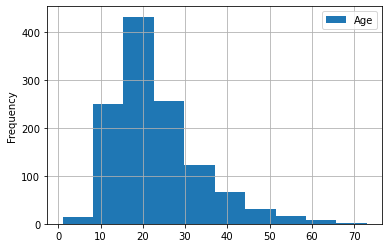

In [70]:
num.plot('Num.','Age', kind = 'hist', grid = True)

### ِAvarege of life time value:

In [8]:
F_countries = main.loc[main['Student/Nationality/Country Name'] == 'Uzbekistan']

In [9]:
F_countries = F_countries.append(main.loc[main['Student/Nationality/Country Name'] == 'Tajikistan'])

In [10]:
F_countries.shape

(1468, 20)

In [11]:
F_countries.drop_duplicates(subset=None,inplace=True)

In [12]:
F_countries.shape

(1468, 20)

In [13]:
F_countries.columns

Index(['Unnamed: 0', 'النوع', 'المستوي', '10 النشاط', 'مواظبة 10',
       'المنتصف 40', 'خ النشاط 5', 'ك التدريبات 5', 'النهائي 80', 'الشفوي 50',
       'المجموع', 'اسم المدرس', 'Name', 'Student/Arabic Name', 'Student/Code',
       'Student/Birth Date', 'Student/Passport No',
       'Student/Nationality/Country Name', 'Student/Complete Address', 'Age'],
      dtype='object')

In [14]:
LTV_countries = F_countries[['Student/Nationality/Country Name','Student/Code']]

In [15]:
LTV_countries.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\الال.xlsx")

### retention rate:

In [16]:
rate = main['Student/Code'].value_counts()

In [17]:
rate.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\عدد الدورات للطالب الواحد.xlsx")
rate.describe()

count    1200.000000
mean        2.773333
std         1.927014
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         8.000000
Name: Student/Code, dtype: float64

In [18]:
rate = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\عدد الدورات للطالب الواحد.xlsx")

In [19]:
rate['No.'].

SyntaxError: invalid syntax (<ipython-input-19-07f723497f8e>, line 1)

### Students Ages:

In [20]:
main['Age'].describe()

count    3328.000000
mean       22.561899
std         9.359167
min         1.000000
25%        16.000000
50%        21.000000
75%        27.000000
max        73.000000
Name: Age, dtype: float64

In [21]:
main[main['Age']< 7]

,Unnamed: 0,النوع,المستوي,10 النشاط,مواظبة 10,المنتصف 40,خ النشاط 5,ك التدريبات 5,النهائي 80,الشفوي 50,المجموع,اسم المدرس,Name,Student/Arabic Name,Student/Code,Student/Birth Date,Student/Passport No,Student/Nationality/Country Name,Student/Complete Address,Age
1030,1032,Male,الفصحى-المستوى الثاني,9.0,8.0,26.0,0,5.0,45.0,45.0,138.0,Abdelrahman Mahmoud,Mohamed Dhayow,محمد دايو,MA-2021-NCR-021943,2017-09-07,563662712,American,مدينة الرحاب مجموعة 23 مبنى 11\n\n \nEgypt,5
1031,1033,Male,الفصحى-المستوى الثالث,7.0,6.0,25.5,0,0.0,0.0,0.0,38.5,Mahmoud El qady,Mohamed Dhayow,محمد دايو,MA-2021-NCR-021943,2017-09-07,563662712,American,مدينة الرحاب مجموعة 23 مبنى 11\n\n \nEgypt,5
1100,1102,Female,الفصحى-المستوى الرابع,10.0,9.5,35.0,5,5.0,70.0,44.0,178.5,Hager Alsayed,Nilufar Askarjonova,نيلوفار اشكرجانوفا,FM-2022-NCR-022072,2019-05-13,FA0972929,Uzbekistan,79شارع الكوثر - الحي العاشر\n\nمدينة نصر \nEgypt,3
1101,1103,Female,الفصحى-المستوى الخامس,9.0,8.5,32.0,5,4.0,68.5,35.0,162.0,Doaa Al Samet,Nilufar Askarjonova,نيلوفار اشكرجانوفا,FM-2022-NCR-022072,2019-05-13,FA0972929,Uzbekistan,79شارع الكوثر - الحي العاشر\n\nمدينة نصر \nEgypt,3
1102,1104,Female,الفصحى-المستوى السادس,10.0,10.0,31.5,5,2.0,72.0,46.0,176.5,mariam saber,Nilufar Askarjonova,نيلوفار اشكرجانوفا,FM-2022-NCR-022072,2019-05-13,FA0972929,Uzbekistan,79شارع الكوثر - الحي العاشر\n\nمدينة نصر \nEgypt,3
1103,1105,Female,الفصحى-المستوى السابع,15.0,8.5,33.0,0,5.0,58.0,43.0,162.5,asmaa hanafi,Nilufar Askarjonova,نيلوفار اشكرجانوفا,FM-2022-NCR-022072,2019-05-13,FA0972929,Uzbekistan,79شارع الكوثر - الحي العاشر\n\nمدينة نصر \nEgypt,3
1104,1106,Female,الفصحى-المستوى الثامن,12.5,8.5,33.5,0,5.0,63.5,33.0,156.0,Ibtesam Wahba,Nilufar Askarjonova,نيلوفار اشكرجانوفا,FM-2022-NCR-022072,2019-05-13,FA0972929,Uzbekistan,79شارع الكوثر - الحي العاشر\n\nمدينة نصر \nEgypt,3
1105,1107,Female,الفصحى-المستوى التاسع,10.0,9.5,31.0,0,0.0,45.0,30.0,125.5,Norhan Mostafa,Nilufar Askarjonova,نيلوفار اشكرجانوفا,FM-2022-NCR-022072,2019-05-13,FA0972929,Uzbekistan,79شارع الكوثر - الحي العاشر\n\nمدينة نصر \nEgypt,3
1137,1139,Male,الفصحى-المستوى الأول,8.0,8.0,28.5,0,5.0,56.5,44.0,150.0,Mahmoud El qady,Suhaib Jamac Musa,صهيب,MA-2021-NCR-021887,2021-10-07,662705720,American,المنطقة التاسعة شارع بلوك 24شقة 3\n\n \nEgypt,1
1138,1140,Male,الفصحى-المستوى الثاني,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,Mahmoud AbdAlrahman,Suhaib Jamac Musa,صهيب,MA-2021-NCR-021887,2021-10-07,662705720,American,المنطقة التاسعة شارع بلوك 24شقة 3\n\n \nEgypt,1


In [23]:
main.drop(main[main['Age']<7].index, inplace= True)

In [23]:
main[main['Age']== main['Age'].min()]

,Unnamed: 0,النوع,المستوي,10 النشاط,مواظبة 10,المنتصف 40,خ النشاط 5,ك التدريبات 5,النهائي 80,الشفوي 50,المجموع,اسم المدرس,Name,Student/Arabic Name,Student/Code,Student/Birth Date,Student/Passport No,Student/Nationality/Country Name,Student/Complete Address,Age
1285,1288,Male,الفصحى-المستوى الخامس,9.0,9.5,38.0,0,5.0,68.5,45.0,175.0,Mostafa Ragab,Mukhammad-Iusuf Alimdzhavov,يوسف,MA-2022-NCR-021997,2015-10-15,PE0323957,Kazakhstan,الحى السويسرى العاشر مدينة نصر\n\n \nEgypt,7
1286,1289,Male,الفصحى-المستوى السادس,6.0,7.0,33.5,5,5.0,75.0,43.0,174.5,Mohamad Abdelnaby,Mukhammad-Iusuf Alimdzhavov,يوسف,MA-2022-NCR-021997,2015-10-15,PE0323957,Kazakhstan,الحى السويسرى العاشر مدينة نصر\n\n \nEgypt,7
1287,1290,Male,الفصحى-المستوى السابع,7.5,8.0,29.5,5,0.0,62.0,47.0,159.0,osama Ammar,Mukhammad-Iusuf Alimdzhavov,يوسف,MA-2022-NCR-021997,2015-10-15,PE0323957,Kazakhstan,الحى السويسرى العاشر مدينة نصر\n\n \nEgypt,7
1288,1291,Male,الفصحى-المستوى الثامن,8.0,7.0,33.0,5,5.0,68.0,45.0,171.0,Abdelrahman Mahmoud,Mukhammad-Iusuf Alimdzhavov,يوسف,MA-2022-NCR-021997,2015-10-15,PE0323957,Kazakhstan,الحى السويسرى العاشر مدينة نصر\n\n \nEgypt,7
1289,1292,Male,الفصحى-المستوى التاسع,7.0,7.0,32.0,4,4.0,75.0,44.0,173.0,Mahmoud Eltony,Mukhammad-Iusuf Alimdzhavov,يوسف,MA-2022-NCR-021997,2015-10-15,PE0323957,Kazakhstan,الحى السويسرى العاشر مدينة نصر\n\n \nEgypt,7
2471,2474,Male,الفصحى-المستوى التمهيدي,10.0,10.0,33.0,5,5.0,7.0,25.0,95.0,Abdelrahman Mahmoud,Muhammed Vejzovic,محمد,MA-2022-NCR-022508,2015-03-30,PB1625883,Slovenia,شارع محمد مصطفى رقم 13\n\n \nEgypt,7
3161,3187,Male,الفصحى-المستوى التمهيدي,9.0,9.0,31.0,5,5.0,64.0,47.0,170.0,Ashry Mohammed,Muhammad Umar Akhmad khodjaev,محمد عمر,MA-2022-NCR-023009,2015-10-25,FA1303825,Uzbekistan,الحى التاسع 29 شارع المقطم\n\n \nEgypt,7


In [24]:
ages = main.drop_duplicates(subset="Student/Code")

In [25]:
ages['Age'].describe()

count    1194.000000
mean       23.173367
std        10.003902
min         7.000000
25%        16.000000
50%        21.000000
75%        27.000000
max        73.000000
Name: Age, dtype: float64

In [26]:
ages.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\Age.xlsx")

<AxesSubplot:ylabel='Density'>

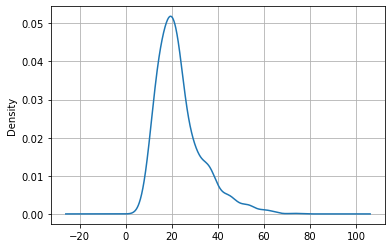

In [27]:
ages['Age'].plot(kind = 'density',
                grid = True,
                )

<AxesSubplot:ylabel='Frequency'>

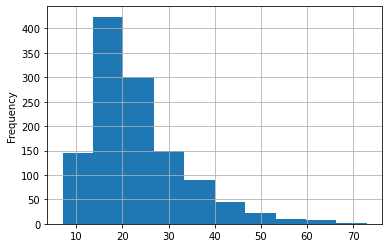

In [28]:
ages['Age'].plot(kind = 'hist',
                grid = True,
            )

### students Avarege of grades:


In [29]:
grades_country = F_countries[['المجموع','Student/Nationality/Country Name']]

In [30]:
grades_country

,المجموع,Student/Nationality/Country Name
11,171.5,Uzbekistan
12,162.5,Uzbekistan
13,151.5,Uzbekistan
20,192.5,Uzbekistan
21,193.0,Uzbekistan
...,...,...
3124,157.0,Tajikistan
3125,149.5,Tajikistan
3195,122.5,Tajikistan
3196,121.0,Tajikistan


In [31]:
x = grades_country.groupby('Student/Nationality/Country Name', as_index = False).mean()
x

,Student/Nationality/Country Name,المجموع
0,Tajikistan,142.372549
1,Uzbekistan,136.492679


In [32]:
x.sort_values(by = 'المجموع', inplace= True)
x

,Student/Nationality/Country Name,المجموع
1,Uzbekistan,136.492679
0,Tajikistan,142.372549


<AxesSubplot:ylabel='Student/Nationality/Country Name'>

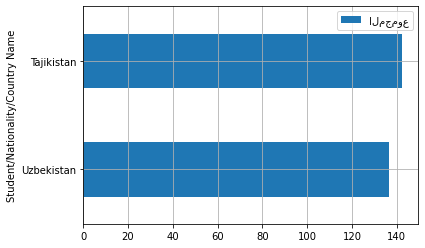

In [33]:
x.plot(kind = 'barh',
     x = 'Student/Nationality/Country Name',
       grid = True)

In [34]:
main.columns

Index(['Unnamed: 0', 'النوع', 'المستوي', '10 النشاط', 'مواظبة 10',
       'المنتصف 40', 'خ النشاط 5', 'ك التدريبات 5', 'النهائي 80', 'الشفوي 50',
       'المجموع', 'اسم المدرس', 'Name', 'Student/Arabic Name', 'Student/Code',
       'Student/Birth Date', 'Student/Passport No',
       'Student/Nationality/Country Name', 'Student/Complete Address', 'Age'],
      dtype='object')

### Teachers productavity:

In [35]:
grades_Teacher = main[['المجموع','المستوي' , 'اسم المدرس']]
grades_Teacher

,المجموع,المستوي,اسم المدرس
0,5.0,الفصحى-المستوى الثامن,Mostafa Ragab
1,116.5,الفصحى-المستوى الثامن,islam farouq
2,0.0,الفصحى-المستوى الثامن,Ashry Mohammed
3,164.0,الفصحى-المستوى الثامن,Mostafa Ragab
4,180.5,الفصحى-المستوى الثامن,Mostafa Ragab
...,...,...,...
3323,182.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3324,182.5,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3325,155.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3326,150.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud


In [36]:
grades_Teacher.drop(grades_Teacher[grades_Teacher['المجموع']<1].index, inplace= True)
grades_Teacher

C:\Users\Ali\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,المجموع,المستوي,اسم المدرس
0,5.0,الفصحى-المستوى الثامن,Mostafa Ragab
1,116.5,الفصحى-المستوى الثامن,islam farouq
3,164.0,الفصحى-المستوى الثامن,Mostafa Ragab
4,180.5,الفصحى-المستوى الثامن,Mostafa Ragab
5,168.5,الفصحى-المستوى التاسع,Hassan Nouby
...,...,...,...
3323,182.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3324,182.5,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3325,155.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3326,150.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud


In [37]:
ئ = grades_Teacher['اسم المدرس'].value_counts()
ئ.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\إنتاجية المدرس.xlsx")

### Teachers ِAverages:

In [38]:
grades_Teacher.drop(grades_Teacher[grades_Teacher['المجموع']<7].index, inplace= True)
grades_Teacher

C:\Users\Ali\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,المجموع,المستوي,اسم المدرس
1,116.5,الفصحى-المستوى الثامن,islam farouq
3,164.0,الفصحى-المستوى الثامن,Mostafa Ragab
4,180.5,الفصحى-المستوى الثامن,Mostafa Ragab
5,168.5,الفصحى-المستوى التاسع,Hassan Nouby
6,186.5,الفصحى-المستوى العاشر,Amr Gamal
...,...,...,...
3323,182.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3324,182.5,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3325,155.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud
3326,150.0,الفصحى-المستوى التمهيدي,Yasmin Mahmoud


In [39]:
y = grades_Teacher.groupby('اسم المدرس', as_index = False).mean()
y.sort_values(by = 'المجموع', inplace= True)
y

,اسم المدرس,المجموع
9,Hassan Nouby,132.440000
1,Abu Bakr Hamada,132.557429
17,Mahmoud Shabaan,134.331967
22,Mostafa Ragab,137.504032
20,Mohamed AbdAllateef,140.215827
15,Mahmoud El qady,140.974522
34,osama Ammar,141.054422
32,islam farouq,144.795775
4,Ashry Mohammed,145.110169
18,Mohamad Abdelnaby,145.351667


In [40]:
y.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\متوسط أداء المدرس.xlsx")

### courses count:

In [41]:
Cour = main['المستوي'].value_counts()
Cour

الفصحى-المستوى الأول          431
الفصحى-المستوى التمهيدي       430
الفصحى-المستوى الثاني         383
الفصحى-المستوى الثالث         344
الفصحى-المستوى الرابع         271
الفصحى-المستوى الخامس         212
الفصحى-المستوى السادس         196
الفصحى-المستوى السابع         191
الفصحى-المستوى الثامن         161
الفصحى-المستوى التاسع         142
الفصحى-المستوى العاشر         113
الفصحى-المستوى الثاني عشر      81
الفصحى-المستوى الحادي عشر      75
الفصحى-المستوى الثالث عشر      74
الفصحى-المستوى الخامس عشر      55
الفصحى-المستوى الرا بع عشر     53
الفصحى-المستوى السابع عشر      50
الفصحى-المستوى السادس عشر      47
Name: المستوي, dtype: int64

In [42]:
Cour.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\بيانات المستويات.xlsx")

### Studens gender

In [43]:
main['النوع'].value_counts()

Male      2155
Female    1154
Name: النوع, dtype: int64

In [44]:
ages['النوع'].value_counts()

Male      762
Female    432
Name: النوع, dtype: int64

# Relation between Data Features

In [24]:
main.head()

,Unnamed: 0,Unnamed: 0.1,النوع,المستوي,10 النشاط,مواظبة 10,المنتصف 40,خ النشاط 5,ك التدريبات 5,النهائي 80,...,المجموع,اسم المدرس,Name,Student/Arabic Name,Student/Code,Student/Birth Date,Student/Passport No,Student/Nationality/Country Name,Student/Complete Address,Age
0,0,0,Male,الفصحى-المستوى الثامن,0.0,0.0,0.0,0,5.0,0.0,...,5.0,Mostafa Ragab,Ammar Nathm Booley,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22
1,1,1,Male,الفصحى-المستوى الثامن,3.0,7.0,21.0,5,5.0,45.5,...,116.5,islam farouq,Ammar Nathm Booley,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22
2,2,2,Male,الفصحى-المستوى الثامن,0.0,0.0,0.0,0,0.0,0.0,...,0.0,Ashry Mohammed,Ammar Nathm Booley,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22
3,3,3,Male,الفصحى-المستوى الثامن,8.0,8.0,31.0,5,5.0,60.0,...,164.0,Mostafa Ragab,Ravil Gatiiatullin,راوفيل,MA-2021-NCR-021414,1949-11-23,722838933,Russia,القاهرة الزيتون شارع 11 المعاوري\n\n \nEgypt,73
4,4,4,Male,الفصحى-المستوى الثامن,10.0,10.0,36.0,5,5.0,67.5,...,180.5,Mostafa Ragab,RAMAZAN AKHMEDOV,رمضان محمد أحمد,MA-2021-NCR-021351,2004-10-16,764815041,Russia,مدينة نصر الحي الثامن أخر مترو عمارات عبد المن...,18


In [12]:
std_grades.groupby('Student/Code', as_index = False).mean()

,Student/Code,المجموع
0,FM-2007-NCR-003816,179.500000
1,FM-2011-NCR-016198,195.000000
2,FM-2013-NCR-016789,95.800000
3,FM-2013-NCR-016821,126.166667
4,FM-2013-NCR-017002,145.000000
...,...,...
1189,MA-2022-NCR-023200,184.000000
1190,MA-2022-NCR-023201,181.000000
1191,MA-2022-NCR-023205,138.500000
1192,MA-2022-NCR-023206,175.500000


In [31]:
main = main.merge(std_grades,
           how = 'outer',
          on = 'Student/Code')

In [41]:
main.head()

,Unnamed: 0,النوع,المستوي,10 النشاط,مواظبة 10,المنتصف 40,خ النشاط 5,ك التدريبات 5,النهائي 80,الشفوي 50,...,Student/Arabic Name,Student/Code,Student/Birth Date,Student/Passport No,Student/Nationality/Country Name,Student/Complete Address,Age,متوسط المجموع,تصنيف العمر,Num.
0,0.0,Male,الفصحى-المستوى الثامن,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22.0,5.0,طلاب الجامعة,3
1,1.0,Male,الفصحى-المستوى الثامن,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22.0,116.5,طلاب الجامعة,3
2,2.0,Male,الفصحى-المستوى الثامن,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22.0,0.0,طلاب الجامعة,3
3,3.0,Male,الفصحى-المستوى الثامن,3.0,7.0,21.0,5.0,5.0,45.5,30.0,...,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22.0,5.0,طلاب الجامعة,3
4,4.0,Male,الفصحى-المستوى الثامن,3.0,7.0,21.0,5.0,5.0,45.5,30.0,...,عمار نظم,MA-2021-NCR-021475,2000-10-04,A08172886,South Africa,فتحي النجار عزبة الهجانة الحي الثامن مدينة نصر...,22.0,116.5,طلاب الجامعة,3


In [40]:
main = main.merge(student_courses,
           how = 'outer',
          on = 'Student/Code')

In [43]:
main.drop_duplicates(subset= None,inplace = True)

In [44]:
main.shape

(13611, 23)

In [19]:
std = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات الطلاب.xlsx",sheet_name = 'Sheet1')

In [22]:
std.to_excel(r"F:\عمل\04 Data analysis\على يسري\أصل بيانات الطلاب.xlsx")

In [20]:
std.columns

Index(['Unnamed: 0', 'النوع', 'اسم المدرس', 'Name', 'Student/Arabic Name',
       'Student/Code', 'Student/Birth Date', 'Student/Passport No',
       'Student/Nationality/Country Name', 'Student/Complete Address', 'Age',
       'تصنيف العمر', 'عدد الكورسات', 'متوسط المجموع'],
      dtype='object')

In [6]:
std_grades = main[['المجموع_x', 'Student/Code']]

In [8]:
std_grades = std_grades.groupby('Student/Code', as_index= False).mean()

In [11]:
std = std.merge(std_grades,
         how = 'outer',
         on = 'Student/Code')

In [12]:
std.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات الطلاب.xlsx")

In [3]:
main = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\البيانات المجمعة.xlsx")

In [3]:
main.head()

,النوع,المستوي,10 النشاط,مواظبة 10,المنتصف 40,خ النشاط 5,ك التدريبات 5,النهائي 80,الشفوي 50,المجموع_x,...,Name,Student/Arabic Name,Student/Code,Student/Birth Date,Student/Passport No,Student/Nationality/Country Name,Student/Complete Address,Age,تصنيف العمر,عدد الكورسات
0,Male,00 الفصحى-المستوى التمهيدي,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Abba Ary Boukar,أبا اري مينة,MA-2022-NCR-022277,1993-08-09,11PC44600,Niger,غمره\n\n \nEgypt,29.0,سن الشباب,7
1,Male,00 الفصحى-المستوى التمهيدي,7.0,7.0,0.0,5.0,5.0,50.5,42.0,116.5,...,Abba Ary Boukar,أبا اري مينة,MA-2022-NCR-022277,1993-08-09,11PC44600,Niger,غمره\n\n \nEgypt,29.0,سن الشباب,7
2,Male,01 الفصحى-المستوى الأول,13.0,12.0,17.5,5.0,5.0,46.5,45.0,144.0,...,Abba Ary Boukar,أبا اري مينة,MA-2022-NCR-022277,1993-08-09,11PC44600,Niger,غمره\n\n \nEgypt,29.0,سن الشباب,7
3,Male,02 الفصحى-المستوى الثاني,8.0,10.0,17.0,5.0,5.0,50.0,33.0,128.0,...,Abba Ary Boukar,أبا اري مينة,MA-2022-NCR-022277,1993-08-09,11PC44600,Niger,غمره\n\n \nEgypt,29.0,سن الشباب,7
4,Male,03 الفصحى-المستوى الثالث,6.0,8.5,13.5,5.0,0.0,52.0,26.0,111.0,...,Abba Ary Boukar,أبا اري مينة,MA-2022-NCR-022277,1993-08-09,11PC44600,Niger,غمره\n\n \nEgypt,29.0,سن الشباب,7


In [4]:
churns = main.drop_duplicates(subset='Student/Code', keep= 'last')
churns

,النوع,المستوي,10 النشاط,مواظبة 10,المنتصف 40,خ النشاط 5,ك التدريبات 5,النهائي 80,الشفوي 50,المجموع_x,...,Name,Student/Arabic Name,Student/Code,Student/Birth Date,Student/Passport No,Student/Nationality/Country Name,Student/Complete Address,Age,تصنيف العمر,عدد الكورسات
6,Male,04 الفصحى-المستوى الرابع,8.5,9.0,20.5,5.0,0.0,47.0,39.5,129.5,...,Abba Ary Boukar,أبا اري مينة,MA-2022-NCR-022277,1993-08-09,11PC44600,Niger,غمره\n\n \nEgypt,29.0,سن الشباب,7
8,Male,01 الفصحى-المستوى الأول,1.0,1.0,0.0,5.0,0.0,0.0,0.0,7.0,...,Abdalla Ismail Mohamed,عبدالله اسماعيل محمد,MA-2022-NCR-022979,2003-08-24,AA0361778,Sweden,29ب السويسري /المرحلة الثانيه\nمدينة نصر\n \n...,19.0,طلاب الجامعة,2
10,Male,07 الفصحى-المستوى السابع,9.0,10.0,38.0,5.0,5.0,79.0,45.0,191.0,...,Abdallah Bulale Mohammed,عبد الله بلال,MA-2021-NCR-021774,1992-08-18,94774116,Sweden,شارع الفاروق عمر عمارة 7 الحى العاشر مدينة نصر...,30.0,سن الشباب,2
13,Male,17 الفصحى-المستوى السابع عشر,10.0,10.0,23.5,5.0,5.0,53.0,38.0,144.5,...,Abdallah Faisal Muhumed,عبدالله فيصل محمد,MA-2021-NCR-020513,2010-12-08,34450821,Norwegian,8 شارع المدينة المنورة الحي العاشر المنطقة الع...,12.0,طلاب المدارس,3
17,Male,05 الفصحى-المستوى الخامس,5.0,6.0,25.0,5.0,5.0,0.0,0.0,46.0,...,Abdallah Khalif Abdulah,عبد الله خليف عبد الله,MA-2021-NCR-021920,2003-04-12,556158720,British,الحي الثامن شارع محمود حب الله عمارة رقم 6 شق...,19.0,طلاب الجامعة,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MA-2022-NCR-022409,NaT,NaN,NaN,NaN,NaN,NaN,5
3311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FM-2022-NCR-022706,NaT,NaN,NaN,NaN,NaN,NaN,2
3312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MA-2021-NCR-021943,NaT,NaN,NaN,NaN,NaN,NaN,2
3313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MA-2022-NCR-022440,NaT,NaN,NaN,NaN,NaN,NaN,2


In [25]:
churns = churns['اسم المدرس'].value_counts()

In [5]:
churns.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\بيانات المنصرفين.xlsx")

In [7]:
churns['المستوي'].value_counts()

00 الفصحى-المستوى التمهيدي       186
01 الفصحى-المستوى الأول          170
02 الفصحى-المستوى الثاني         154
03 الفصحى-المستوى الثالث         134
04 الفصحى-المستوى الرابع         106
05 الفصحى-المستوى الخامس          70
07 الفصحى-المستوى السابع          62
17 الفصحى-المستوى السابع عشر      50
06 الفصحى-المستوى السادس          48
08 الفصحى-المستوى الثامن          44
09 الفصحى-المستوى التاسع          42
10 الفصحى-المستوى العاشر          39
12 الفصحى-المستوى الثاني عشر      26
11 الفصحى-المستوى الحادي عشر      19
14 الفصحى-المستوى الرا بع عشر     14
13 الفصحى-المستوى الثالث عشر      12
15 الفصحى-المستوى الخامس عشر      11
16 الفصحى-المستوى السادس عشر       7
Name: المستوي, dtype: int64

In [8]:
churns_courses = churns['المستوي'].value_counts()

In [10]:
churns_courses.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\بيانات المستوي.xlsx")

In [27]:
churns = pd.read_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\بيانات المنصرفين.xlsx")

In [35]:
teachers.to_excel(r"F:\عمل\04 Data analysis\على يسري\بيانات جزئية مستخلصة\بيانات المدرسين.xlsx")

In [32]:
teachers = teachers.merge(churns,
              how = 'outer',
              on = 'اسم المدرس')

,Unnamed: 0,اسم المدرس,عدد الطلاب,متوسط المجموع,عدد المنصرفين
0,1.0,asmaa hanafi,147.0,166.877551,73.0
1,2.0,mariam saber,65.0,163.346154,13.0
2,3.0,Sahar Abdo,76.0,162.968132,31.0
3,4.0,Doaa Al Samet,136.0,162.151029,59.0
4,5.0,Norhan Mostafa,124.0,161.721774,54.0
5,6.0,Hager Alsayed,116.0,160.650862,53.0
6,7.0,Abdelrahman Mahmoud,111.0,160.630631,49.0
7,8.0,Mahmoud Eltony,78.0,159.153846,29.0
8,9.0,Yasmin Mahmoud,140.0,157.078571,66.0
9,10.0,ahmed abd el raoof,91.0,151.005495,35.0


# THE End
## والحمد لله رب العالمين